# Basics of NLP: DataFrame rudiments and spaCy

## Libraries 

We will consider a corpus of radio recordings in french (source: France inter, RFI, ...) :  RADIOS.txt


The first step in writing python code is determining which libraries we want to use. To stay organized, we generally import all libraries at the top (of a notebook or a standalone python file).

In [3]:
#import four important libraries
import pandas as pd
#pandas is the most popular data science library. It is used
#for organizing data into columns.
#See more here: https://pandas.pydata.org/

import re
#re is the python library for regular expressions. It is
#difficult to master, but very useful.
#See more here: https://docs.python.org/3/library/re.html

import matplotlib.pyplot as plt
#matplotlib is the most popular and simple library for
#scientific plots in python. The pyplot submodule is
#a data scientist's bread and butter for data visualization.
#See more here: https://matplotlib.org/2.0.2/api/pyplot_api.html

import xml.etree.ElementTree as ET
#ElementTree is a library for parsing XML in python.
#This is a useful skill for data scientists, as lots of data
#is published in XML form. There are other libraries for this,
#such as untangle or xmltodict; however, ElementTree is lower level.
#See more here: https://docs.python.org/3/library/xml.etree.elementtree.html

from numpy import log
#we will need a logarithm function; numpy is a standard mathematical
#library

## Pandas Dataframe basics

In this TP we use Pandas [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) to manage our dataset. Pandas is a standard tool in data science.

In [4]:
#read the dataset as a DataFrame
df_radios = pd.read_csv('RADIOS.txt', names=['text'])

In [5]:
print(len(df_radios))
df_radios.head()

35356


,text
0,patricia martin que voici que voilà
1,oh bonjour nicolas stoufflet
2,france-inter sept heures
3,le journal simon tivolle
4,bonjour


We can list the columns of a dataset ````df```` by calling ````df.columns````.

**Question**: What are the columns of the dataset ````df_radios````?

In [8]:
df_radios.columns

Index(['text'], dtype='object')

### Explain each column 
There is only one column, where each line corresponds to one line of the document.

We can access to a specific using ````df.loc[i]```` or ````df.iloc[i]```` 


**Question**: What is the difference between .loc and .iloc?

**Response**: 
- loc: This attribute is label-based, which means it's used for selecting data based on the labels of the rows and columns. When using .loc, you specify the row and column labels explicitly.

- iloc: This attribute is integer position-based, which means it's used for selecting data based on the integer index of the rows and columns. When using .iloc, you specify the row and column positions explicitly.

In [10]:
#todo: save the text value of the 5th element of our dataset into the one_text variable. 
one_text = df_radios.iloc[5].text 

We can count the number of words in a string using the ````len```` function and ````split```` method of strings. For example:


```
string = "bla bla bla"
len(string.split(" "))
>>> 3
```

**Question**: Fill in the following function and run it for a our ````one_text```` example. 






In [11]:
def num_words(sentence):
    '''
    Calculate the number of words in the sentence.
    '''
    return len(sentence.split(" "))

print(num_words(one_text))

3



Furthermore, we can calculate values for each row, based on a specific column, using the ````apply```` method:

```
lengths = df.column_name.apply(lambda text: num_words(text))
```

This will give us a [pandas Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) of the lengths of each text.

**Question**: Add the length of each text as a new column in the dataframe (see [pandas docs](https://pandas.pydata.org/docs/user_guide/dsintro.html#basics-dataframe-sel-add-del) for details). 

**Question**: What is the distribution of the length of the texts in words? Visualize this using a python plot (see [plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).

**Response**: The distribution of the length of the texts in words is half-normal.


(array([1.2295e+04, 9.6080e+03, 5.9810e+03, 3.1830e+03, 1.4720e+03,
        8.0400e+02, 4.9600e+02, 3.2700e+02, 2.0900e+02, 1.4300e+02,
        1.3100e+02, 1.0100e+02, 8.5000e+01, 8.4000e+01, 6.3000e+01,
        5.0000e+01, 4.7000e+01, 2.7000e+01, 3.1000e+01, 3.6000e+01,
        3.9000e+01, 1.4000e+01, 2.6000e+01, 1.2000e+01, 1.6000e+01,
        1.0000e+01, 1.3000e+01, 9.0000e+00, 5.0000e+00, 2.0000e+00,
        5.0000e+00, 3.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

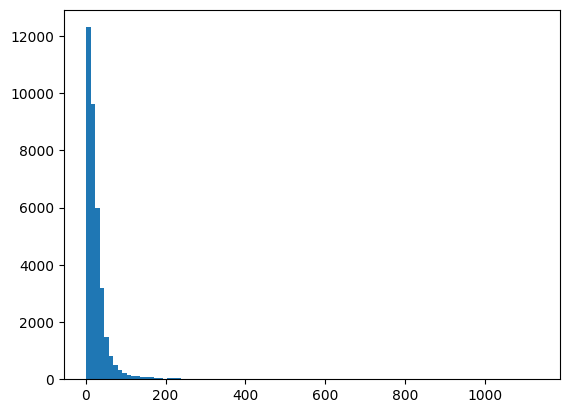

In [12]:
df_radios['lengths'] = df_radios.text.apply(lambda text: num_words(text))

## to plot 
plt.hist(df_radios['lengths'],bins=100)

We can filter a dataframe using criteria based on values in certain columns. The basic syntax for this is:

````
new_df = df[df["column"].apply(lambda row_value: my_func(row_value) == some_value)]
````

This gives a new DataFrame composed of all elements of ````df```` such the values of the function ````myfunc````, calculated for the value of column "column" for each row is equal to some_value. For example, if we wanted all rows that begin with "a", we could run:

````
df_letter_A = df[df["text"].apply(lambda text: text[0] == "a")]
````

**Question**: Retain only documents with at least 50 words

In [13]:
df_at_least_50 = df_radios[df_radios.lengths > 50]
df_at_least_50.head()

,text,lengths
34,il quitte l' école à douze ans pour aider son ...,56
42,selon jack lang césar était était l' une des f...,62
45,la chaîne de l' espoir c'est une association c...,52
46,l' association a été créée par un professeur e...,55
100,nicole notat est arrivée en trois ans à réduir...,60


### Finding useful information in the text:

We will implement regular expresions (regex) to filter the text according to a specific condiction. 

To implement the regex evaluation in Pandas we use the [`Series.str.contains`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) filtering function, as :

```` df.column_name.str.contains('[a-z]', regex=True)````

Also useful: `match`, `Series.str.startswith`, `Series.str.endswith`


**Question** : How many texts are there with at least one word of 9 letters in RADIOS.txt?
**Response** : There is 23744 texts with at least one word of 9 letters.


**Question** : Are there any texts with words without vowels in RADIOS.txt?
**Response** : Yes.

You can use the following regexs : 

| regex | Description |
|--------|--------------------|
|`'[A-Z]'`|filtre lignes contenant une majuscule|
|`'^[A-Z]'`|filtre lignes commençant par une majuscule|
|`'[A-Z]$'`|filtre lignes finissant par une majuscule|
|`'^[A-Z]*$'`|filtre lignes entièrement majuscules|
|`'[aeiouAEIOU]'`|filtre lignes contenant une voyelle|
|`'^[aeiouAEIOU]'`|filtre lignes commençant par une voyelle|
|`'[aeiouAEIOU]$'`|filtre lignes finissant par une voyelle|
|`'^[^aeiouAEIOU]'`|filtre lignes commençant par une non-voyelle|
|`'[^aeiouAEIOU]$'`|filtre lignes finissant par une non-voyelle|
|`'[aeiouAEIOU].*[aeiouAEIOU]'`|filtre lignes avec au moins deux voyelles|
|`'^[^aeiouAEIOU]*[aeiouAEIOU][^aeiouAEIOU]*$'`| filtre lignes avec exactement une voyelle|

Avec expressions régulières:

| Expression | Match |
|--------|--------------------|
|`a`|la lettre "a"|
|`[a-z]`|une lettre minuscule|
|`[A-Z]`|une lettre majuscule|
|`[0-9]`|un chiffre|
|`[0123456789]`|un chiffre|
|`[aeiouAEIOU]`|une voyelle|
|`[^aeiouAEIOU]`|tout sauf une voyelle|
|`.`|un caractère|
|`^`|début de ligne|
|`$`|fin de ligne|
|`x*`| "x" répété 0 fois ou plus|
|``x+``| "x" répété 1 fois ou plus|
|`x\|y`| "x" ou "y"|

In [14]:
## For example: 
df_radios['a-z'] = df_radios.text.str.contains('[a-z]', regex=True)
df_radios[df_radios['a-z']]

,text,lengths,a-z
0,patricia martin que voici que voilà,6,True
1,oh bonjour nicolas stoufflet,4,True
2,france-inter sept heures,3,True
3,le journal simon tivolle,4,True
4,bonjour,1,True
...,...,...,...
35351,sport athlétisme pour terminer le triple champ...,99,True
35352,l' éthiopienne defar meseret est entrée quatri...,19,True
35353,la fin de cette édition le rappel de ses princ...,44,True
35354,au libéria l' armée de charles taylor en alert...,15,True


In [15]:
df_radios['text'].str.contains('[a-zA-Z]{9,}', regex=True).sum()

df_radios['text'].str.contains('[^aeiouyAEIOUY]+', regex=True).any()

True

## Vocabulary 

We will create a a dictionary as the vocabulary for our corpus of texts. 
Create a dictionary where each key is a word and the value will be its frequency. 

```` texts_vocab = {'key1':value, 'key2':value} ````

**Question** Create a Vocabulary of bigrams and trigrams 

**Question** : How many different words exist in our corpus of texts? 
**Response** : 34005.

**Question** : What is the frequency distribution of the words? use ```plt.hist```

**Question** [optional] How many bigrams and trigrams exist? Visualize the frequency distribution. 
**Response** : There are 274509 bigrams and there are 561563 trigrams.


In [16]:
all_text = ' '.join(df_radios['text'])

# Tokenize the text into words
words = all_text.split()

# Convert words to lowercase for case-insensitive counting
words_lower = [word.strip(".,!?;:\"'").lower() for word in words]

# Count the frequency of each word and create a dictionary
texts_vocab = pd.Series(words_lower).value_counts().to_dict()

texts_vocab

{'de': 44319,
 'la': 27268,
 'le': 23829,
 'l': 19710,
 'à': 18493,
 'et': 17951,
 'les': 17871,
 'des': 14089,
 'un': 11925,
 'en': 11805,
 'd': 11238,
 'du': 10156,
 'a': 10100,
 'qui': 9099,
 'il': 8880,
 'une': 8768,
 'que': 8298,
 'euh': 8072,
 'dans': 8003,
 'pour': 7882,
 'est': 6859,
 'ce': 6067,
 "c'est": 6054,
 'pas': 5999,
 'au': 5694,
 'sur': 5232,
 'on': 4708,
 'par': 4689,
 'qu': 4261,
 'ont': 3575,
 'se': 3547,
 'avec': 3543,
 'je': 3500,
 'mais': 3484,
 'plus': 3379,
 'deux': 3282,
 'n': 3275,
 'y': 3259,
 'vous': 3151,
 'cette': 3048,
 'sont': 3012,
 'ne': 2996,
 'été': 2547,
 'son': 2533,
 'nous': 2478,
 's': 2459,
 'ça': 2095,
 'donc': 2058,
 'tout': 2049,
 'aux': 2031,
 'ils': 1985,
 'fait': 1929,
 'mille': 1917,
 'ou': 1804,
 'comme': 1797,
 'trois': 1732,
 'sa': 1721,
 'très': 1697,
 'pays': 1679,
 'même': 1640,
 'ces': 1603,
 "aujourd'hui": 1568,
 'elle': 1567,
 'heures': 1522,
 'aussi': 1489,
 'si': 1438,
 'france': 1432,
 'leur': 1370,
 'président': 1358,
 'bie

In [17]:
bigrams = []
trigrams = []

# Iterate over each row in the DataFrame
for index, row in df_radios.iterrows():
    # Tokenize the text into words
    words = row['text'].split()
    # Generate bigrams
    for i in range(len(words) - 1):
        bigrams.append((words[i], words[i+1]))
    # Generate trigrams
    for i in range(len(words) - 2):
        trigrams.append((words[i], words[i+1], words[i+2]))

# Convert lists to sets to remove duplicates
bigram_set = set(bigrams)
trigram_set = set(trigrams)

In [18]:
len(texts_vocab)

34005

(array([3.3808e+04, 9.5000e+01, 3.2000e+01, 1.5000e+01, 9.0000e+00,
        4.0000e+00, 3.0000e+00, 8.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

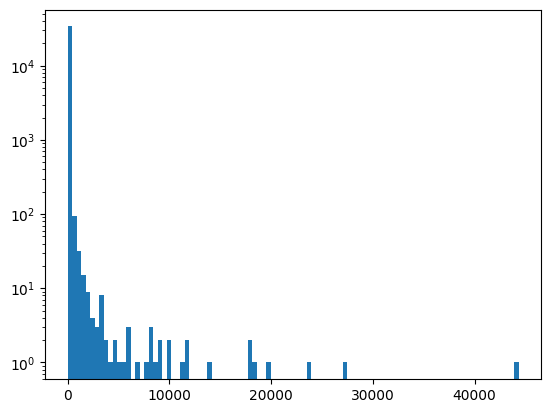

In [19]:
plt.hist(texts_vocab.values(), bins=100, log=True)

In [20]:
len(bigram_set)

274509

In [21]:
len(trigram_set)

561563

## Introduction to spaCy

spaCy is a package that performs some basic NLP tasks for us, based on training on a large corpus. We can import spaCy libraries for different languages and of different complexities (often in small, medium, and large sizes, where larger means slower to use but with slightly more precise behaviour). For our use case, we will "fr_core_news_sm", which is the small French language  model.

For basic questions about spaCy, refer to the documentation [here](https://spacy.io/usage/spacy-101).

In [1]:
!python3 -m spacy download fr_core_news_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [8]:
import spacy
from spacy.lang.fr.examples import sentences 
# nlp = spacy.load("en_core_web_sm") 
nlp = spacy.load("fr_core_news_sm")  #this could take a minute to download the first time

The ````nlp```` object can be used to analyze documents. For example:

````doc_analyzed = nlp("Hello world")
doc_analyzed
>>> Hello world
type(doc_analyzed)
>>> spacy.tokens.doc.Doc
````

In [23]:
doc = nlp(one_text)
type(doc)

spacy.tokens.doc.Doc


**Question**: Use spaCy to list each token in the ````text```` of the document with id 1500.

*Hint: spacy.tokens.doc.Doc is an iterable*

In [24]:
text = df_radios.loc[1500, 'text']

doc = nlp(text)

for token in doc:
    print(token.text)

c'
est
pour
ça
que
nous
sommes
associés
à
elle


**Question** : List the POS of every token from the previous exercise. Do you agree with spaCy?

**Response** : For us there are 2 mistakes : 'est' should be a verb here and 'que' should be a subordinating conjunction (SCONJ)

*Hint: use token.pos_*

In [25]:
for token in doc:
    print(token.text, token.pos_)

c' PRON
est AUX
pour ADP
ça PRON
que PRON
nous PRON
sommes AUX
associés VERB
à ADP
elle PRON


The lemma of a term is the simplest and most distilled version of the term, without prefixes, suffixes, etc. Converting terms to lemmas can be useful in order to reduce the vocabulary size of a corpus and group terms into equivalence classes. For example, "run", "runs", "running", and "ran" all share roughly the same semantic meaning, and in some contexts (though not all!) should be treated the same way.

**Question** : extract the lemmas from the previous exercise. Which terms stay the same, and which differ? In what ways do they differ?

**Response** : 'que', 'nous' and 'à' stay the same while others differ. For example, conjugate verbs become infinitive, contracted pronouns are in their usual form, and the gendered words become neuter. 

*Hint: use token.lemma_*

In [26]:
for token in doc:
    print(token.text, token.lemma_)

c' ce
est être
pour pour
ça cela
que que
nous nous
sommes être
associés associer
à à
elle lui


**Question**: How many unique terms are there among all the texts? How many unique *lemmas* are there among all the texts?

**Response** : There are 33848 different terms among all the texts and there are 24472 different lemmas among all the texts.

In [34]:
def to_lemma(text):
    doc = nlp(text)
    return set([token.text for token in doc])

df_radios['terms'] = df_radios['text'].apply(lambda x: to_lemma(x))

In [35]:
from functools import reduce

union_of_terms = reduce(lambda x, y: x.union(y), df_radios['terms'])

In [36]:
len(union_of_terms)

33848

In [27]:
def to_lemma(text):
    doc = nlp(text)
    return set([token.lemma_ for token in doc])

df_radios['lemma'] = df_radios['text'].apply(lambda x: to_lemma(x))

In [31]:
union_of_lemmas = reduce(lambda x, y: x.union(y), df_radios['lemma'])

In [33]:
len(union_of_lemmas)

24472

**Question**: Plot the distribution of POS over the all the texts.

In [ ]:
#todo

**Question**: Plot the distribution of the 100 most common words over the all the texts, provided that they are not space or punctuation. Use a log scale for the y axes and describe the graph: the y axis should be frequency, and the x axis should be words sorted by frequency.

*Hint: see [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law)*

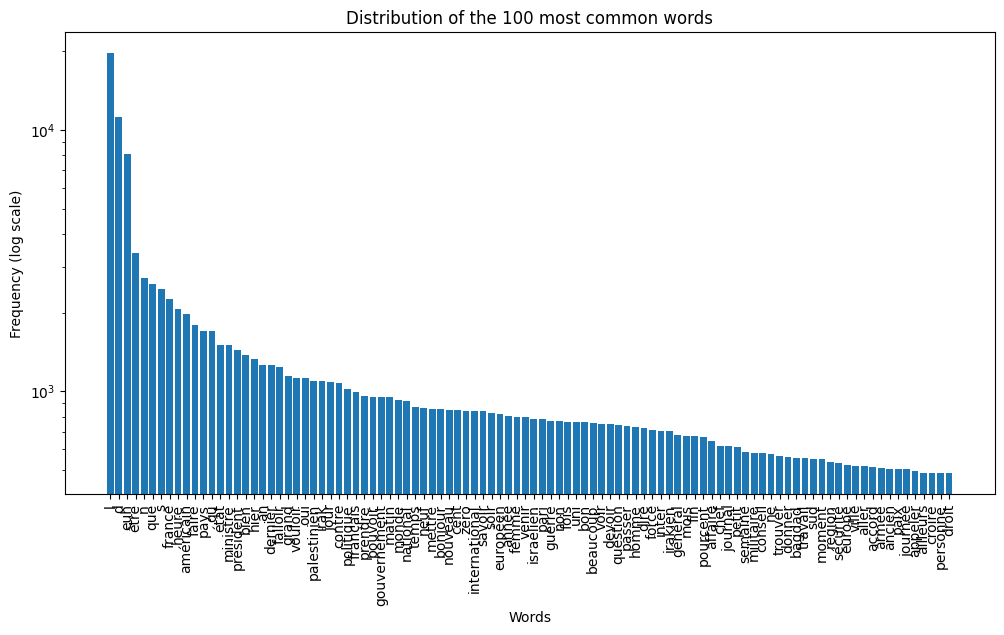

In [12]:
from collections import Counter

# Combine all texts into a single string
all_texts = ' '.join(df_radios['text_clean'])

# Tokenize the text and count the frequency of each word
words = all_texts.split()
word_counts = Counter(words)

# Filter out spaces and punctuation
filtered_word_counts = {word: count for word, count in word_counts.items() if word.isalnum()}

# Sort words by frequency in descending order
sorted_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True))

# Select the top 100 most common words
top_100_words = list(sorted_word_counts.keys())[:100]
top_100_counts = list(sorted_word_counts.values())[:100]

# Plot the distribution on a log scale
plt.figure(figsize=(12, 6))
plt.bar(top_100_words, top_100_counts)
plt.yscale('log')
plt.xlabel('Words')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of the 100 most common words')
plt.xticks(rotation=90)
plt.show()


## Stop words

Stop words are words that, under some frameworks, contribute marginal semantic value, but are important for syntax. For example, "the", "and", "such", etc.

**Question**: In what kind of analysis can we strike stop words without worrying about losing information? In what kind of analysis might we want to keep them around?

**Response** :
- Text Classification : This kind of analysis do not generally need stop words as the other words present in the dataset are more important and give the general idea of the text. So, we generally remove stop words in such tasks.
- In Language Classification or Spam Filtering, stop words can be removed without worrying about losing information.
- Sentiment analysis : If we are training a model for sentiment analysis, we might not remove the stop words because they can change the meaning of a review, for example.

**Question**: Write a function:

````def clean(sentence)````

that strikes all stop words, replaces each remaining token with its lemma. Create a cleaned version of each abstract, and save this cleaned version as a new column of the dataframe called "text_clean".

In [10]:
def clean(sentence):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    # Initialize an empty list to store cleaned tokens
    cleaned_tokens = []
    # Iterate over each token in the processed document
    for token in doc:
        # Check if the token is not a stop word and is not punctuation
        if not token.is_stop and not token.is_punct:
            # Append the lemma of the token to cleaned_tokens
            cleaned_tokens.append(token.lemma_)
    # Join the cleaned tokens into a single string
    cleaned_sentence = ' '.join(cleaned_tokens)
    return cleaned_sentence

# Apply the clean function to each abstract in the DataFrame
df_radios['text_clean'] = df_radios['text'].apply(clean)

In [11]:
df_radios['text_clean'].head()

0                patricia martin
1    oh bonjour nicola stoufflet
2             france inter heure
3          journal simon tivolle
4                        bonjour
Name: text_clean, dtype: object

## Dependencies
spaCy calculates dependencies between different tokens:

In [88]:
exp_doc = nlp("Hello! I hope you are well.")
# exp_doc = nlp(one_text)
for word in exp_doc:
   print(word.text, word.tag_, word.head)

Hello PROPN Hello
! PUNCT Hello
I NOUN I
hope NOUN hope
you NOUN hope
are VERB hope
well PROPN hope
. PUNCT hope


We can visualize this using dispacy, a visualization library:

In [89]:
from spacy import displacy
displacy.render(exp_doc, style='dep', jupyter=True, options={'distance': 130})

**Question** : Visualize a random title from the dataframe - describe the visualization.

**Response** : On the sentence below, we see that "morts" is the main word of the sentence because all words have a dependency with it except number, adverb, determiner and adpreposition, because these ones either link other words between them or add an information. 

In [96]:
displacy.render(nlp(df_radios['text'].iloc[15]), style='dep', jupyter=True, options={'distance': 130})


## NER

spaCy can determine named entities.

In [37]:

for ent in nlp("Joe Biden is the president of the USA").ents:
    print("ENT: ", ent.text, ent.label_, spacy.explain(ent.label_))


ENT:  Joe Biden PER Named person or family.


**Question**: calculate the ten most common named entities and the five most common labels among the texts.

In [39]:
from collections import Counter
import spacy

# Initialize counters for named entities and labels
entity_counter = Counter()
label_counter = Counter()

# Iterate over each text in the DataFrame
for text in df_radios['text']:
    # Process the text with spaCy
    doc = nlp(text)
    # Extract named entities and update the entity counter
    for ent in doc.ents:
        entity_counter[ent.text] += 1
        # Update the label counter
        label_counter[ent.label_] += 1

# Print the ten most common named entities
print("Ten most common named entities:")
for entity, count in entity_counter.most_common(10):
    print(entity, count)

# Print the five most common labels
print("\nFive most common labels:")
for label, count in label_counter.most_common(5):
    print(label, count)

Ten most common named entities:
irak 769
paris 601
france 566
la france 510
états unis 489
bagdad 475
israël 401
américains 335
saddam hussein 318
europe 288

Five most common labels:
LOC 15532
PER 10650
ORG 3344
MISC 2409


## TF-IDF

One of the most important statistics we can calculate for a document is the TF-IDF score. This stands for "term frequency-inverse document frequency" score, and it is a measure of the importance of each word to a given document, in the context of the corpus of documents. For each word in each document, we calculate the following ratio:

$\frac{TF_{word; doc}}{IDF_{word; doc}}$

$TF_{word; doc} = \frac{\text{Total counts of word in doc}}{\text{Number of terms in doc}}$

$IDF_{word; doc} = \log{\left(\frac{|\text{corpus}|}{\text{Number of docs containing word}}\right)}$

To have a high TF-IDF score in a document, a word must occur frequently in a document, while appearing rarely in others.

**Question**: Give the limits of TF and IDF for a word/document pair, and give an example of a word-document pair where this might occur (for example, word="Hello", doc=Wikipedia page for greetings, corpus=all of Wikipedia).


**Question**: Code the functions TF and IDF:

In [54]:
import math

def tf(word, document):
    # Calculate term frequency (TF)
    word_count = document.count(word)
    total_terms = len(document.split())
    tf_score = word_count / total_terms
    return tf_score

def idf(word, all_documents):
    # Calculate inverse document frequency (IDF)
    num_docs_containing_word = sum(1 for document in all_documents if word in document)
    idf_score = math.log(len(all_documents) / (1 + num_docs_containing_word))
    return idf_score


def tf_idf(word, document, all_documents):
    return tf(word, document)/idf(word, all_documents)

#test your code:
my_text = df_radios.iloc[7].text_clean
tf_idf("et", my_text, df_radios.text_clean)

0.0

**Question**: What is the word with the highest and lowest TF-IDF score?

In [ ]:
# Function to calculate TF-IDF score for each word in a document
def calculate_tf_idf(document, all_documents):
    tf_idf_scores = {}
    # Iterate over each word in the document
    for word in set(document.split()):
        # Calculate TF-IDF score for the word
        tf_idf_scores[word] = tf_idf(word, document, all_documents)
    return tf_idf_scores

# Calculate TF-IDF scores for all documents
all_tf_idf_scores = []
for document in df_radios.text_clean:
    tf_idf_scores = calculate_tf_idf(document, df_radios.text_clean)
    all_tf_idf_scores.append(tf_idf_scores)

# Flatten the list of TF-IDF scores into a single dictionary
all_tf_idf_scores_flat = {}
for tf_idf_scores in all_tf_idf_scores:
    all_tf_idf_scores_flat.update(tf_idf_scores)

# Find the word with the highest TF-IDF score
highest_tf_idf_word = max(all_tf_idf_scores_flat, key=all_tf_idf_scores_flat.get)
highest_tf_idf_score = all_tf_idf_scores_flat[highest_tf_idf_word]

# Find the word with the lowest TF-IDF score
lowest_tf_idf_word = min(all_tf_idf_scores_flat, key=all_tf_idf_scores_flat.get)
lowest_tf_idf_score = all_tf_idf_scores_flat[lowest_tf_idf_word]

print("Word with the highest TF-IDF score:", highest_tf_idf_word, "TF-IDF score:", highest_tf_idf_score)
print("Word with the lowest TF-IDF score:", lowest_tf_idf_word, "TF-IDF score:", lowest_tf_idf_score)


**Question**: If we took each document and duplicated it in place, i.e.:

a document "hello world" would become "hello world hello world", how would the tf-idf score of any document-word pair change?

What about if instead of duplicating in place, we doubled the size of the corpus, i.e.

if document "hello world" is in the corpus once, we add a second copy so now it is in the corpus twice. How would the tf-idf score of any document-word pair change now?

**Response** : 
- If we duplicate in place, the TF-IDF score doesn't change. In fact, numerator and denominator of TF factor are both multiplied by 2 (so it doesn't change). Also, the number of document in the corpus doesn't change and the number of document containing the word doesn't change neither. To conclude, neither TF nor IDF change so the TD-IDF score is the same.

- In the case of a doubling the size of the corpus, the TD-IDF score doesn't change. In fact, the TF factor is not impacted. Also, both numerator and denominator of the IDF factor are multiplied by 2. To conclude, TF-IDF score is the same. 

**Question** : What could be a potential use-case for the TF-IDF score in practice ?

**Response** : The TF-IDF score is useful for building search engine, especially for the referencing part.  

### Final Comments 

Add your conclusions about this lab. You can include your level of satisfation with your work and your opinion on the length and difficulty of the exercises.